In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
%load_ext line_profiler
%load_ext memory_profiler

In [3]:
import utils.genprodUtils as gen

In [4]:
from utils.genprodUtils import two_body_decay, hadronization
from utils.genprodUtils.generators.x_hh_4b import swap_objects, Generator, cluster_jets, gen_match_jets

In [6]:
nanoaod = Tree('/store/user/ekoenig/MultiHiggs/DiHiggs/RunII/FeynNetTraining_27June2023/ForFeynNet_UL18_SignalPlusBackground_27June2023/GluGluToHHTo4B_node_cHHH1_TuneCP5_13TeV-powheg-pythia8/train_ntuple.root', treename='sixBtree', normalization=None)

100%|██████████| 1/1 [00:00<00:00,  1.77it/s]


In [28]:
genbs_mask = nanoaod.jet_signalId > -1
genb_recojet = get_collection(nanoaod, 'jet', named=False)[genbs_mask]

(<Figure size 650x650 with 1 Axes>,
 <AxesSubplot:ylabel='Events'>,
 <utils.plotUtils.histogram.Histo at 0x7f67fe3d5790>)

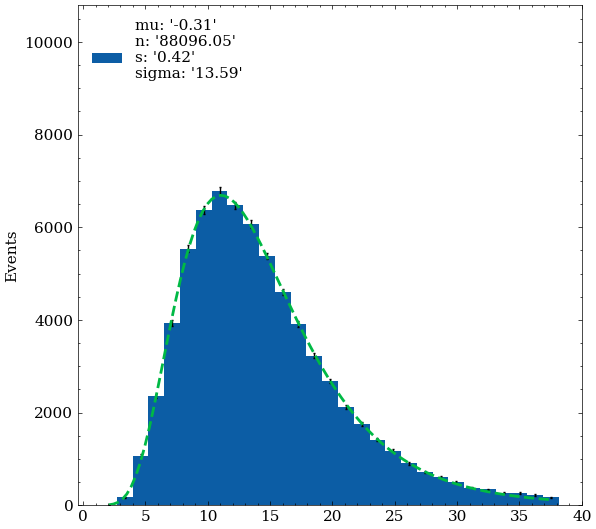

In [33]:
histo_array(genb_recojet.m, h_fit='lognormal', h_fit_show=True, h_label_stat="{fit:0.2f}", legend=True,)

In [83]:
gen_info = dict(
    pt = lambda n : np.random.exponential(50, n),
    eta = lambda n : np.random.normal(0, 1.5, n),
    phi = lambda n : np.random.uniform(-np.pi, np.pi, n),
    mass = lambda n : np.ones(n) * 125,
)

higgs_generator = Generator(gen_info)

In [84]:
H = higgs_generator.event(10000)

In [88]:
bb_m = lambda n : np.random.lognormal(2.5, 0.5, size=n)

In [89]:
b1, b2 = two_body_decay(H, bb_m, bb_m)

(<Figure size 650x650 with 1 Axes>,
 <AxesSubplot:ylabel='Events'>,
 <utils.plotUtils.histogram.Histo at 0x7f67f2a81d90>)

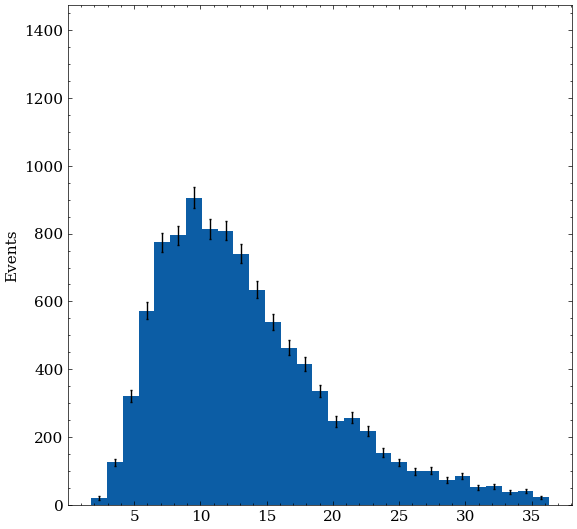

In [98]:
histo_array(b1.m)

In [127]:
# generate 10 random strings of size 64
nstr = 30
strings = np.random.choice(list('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'), size=(nstr, 128))
strings = np.array([ ''.join(string) for string in strings ])
int_array = np.random.randint(nstr, size=int(2e6))
str_array = strings[int_array]

In [126]:
%timeit np.unique(str_array)

7.33 s ± 652 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [128]:
%timeit np.unique(int_array)

88.6 ms ± 69.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [132]:
setattr(nanoaod.ttree, 'filemap', strings)

In [135]:
nanoaod.ttree.test_filemap = strings

In [136]:
nanoaod.ttree.test_filemap

array(['VWPwzoqlYLgrFUOOUfTzKToOygUjArdEYzLstCZsOfbfURVUZSTGQwjyrqdOAkIWOGkEvAERHJDNthioHiJoVNMfhiDqBQttYmjEIFateTwNNaaONZrOJlKfnvdEZpHu',
       'sgdjznDObkzQMvOLpNegkfYvPUxsWiazLADpkqwuDOhDvOOLyBqfUMVOwLmiaDgJWOmbnwCJGYVejWWxunXvXCgEFwHcWheMSSTnDiPdsLicnkFenKNVabRVxoXANzNj',
       'AEiNFpgHFsOSySeMHtqZobjTYvQgVDyajGzkGvptPtPAeoRHfQQpgJQkjxVzIAeANHapjAnZXCxNDCOIVoBgIruKkydjhcjrlJKnMhWHwKAPoSITgStTbPLGMSURCqOT',
       'ZGxRiSAjhQgqpXspILHLDoiEwauYidkvDoxqZwrgYxufkJqWvhQHQTHuhIJkkhOtikZMFWVEkjMYbCpgfnvsgvIEbEPQhvrfZKbCmHymAQCtLzNMXDnptOxERuCGUROw',
       'OhsQSZMJhSqztrhdFkxtiCICZGMFlCLZnioMzathHRUgdzEhQpEPeSwwgJmODcULXsPDxJlocSmvYAjhTBxdXyaAGAoaKsvKvGeJovLRJdEKmDbUzpZGlBYQlTFFzFvA',
       'RFcDtrkNOvigbhbaHUobyBnBZTqHdQDaJLArAsGHrpBFGfmWfKgdHqwOvBGispAnKDPwhhEZpIxwUVkMdhoXRkBbSNMwZvYNjikqiNFtpKxapiuaDuCWrZDnyMsXIglw',
       'FrEpVZOTcYLAtQLdeYswHespyxZWsiBCGfDdNqrkEwJuhsXFfrKDTXsvrxyyHSVwgZqJXnTgTapOcjhGGXuDymjLxqvrQgWjqsdyUqXlDeaGbBLHoXByeMDmnQHGdGlG',
       'wHKieCvnKCSMEMcIgFu